<a href="https://colab.research.google.com/github/SergeiNevolin/jupyter_notebooks/blob/main/%D0%9D%D0%B5%D0%B2%D0%BE%D0%BB%D0%B8%D0%BD_%D0%A1%D0%B5%D1%80%D0%B3%D0%B5%D0%B9_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BA_%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D1%8E_4%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика
Неявка на прием к врачу — серьезная проблема в сфере общественного здравоохранения. Пропущенные приемы обходятся системе здравоохранения в США почти в [200 долларов каждый](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4714455/). Поэтому неудивительно, что снижение количества неявок стало приоритетом в Соединенных Штатах и во всем мире. Были проведены [многочисленные исследования](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3962267/) с целью определения наиболее эффективных средств снижения показателей невыхода на работу. Первым шагом к решению проблемы является понимание того, почему пациент пропускает запланированное посещение.

[Данные](https://drive.google.com/open?id=1bvlBkt0AYFw6ZLSjB41xHLnCLkweXxXE), 

Описание данных можно найти на [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments)

Мы хотим ответить по существу на два вопроса:


1.   Каков портрет человека, пропускающего запланированные визиты к врачу?
2.   Какие факторы влияют на неявку?

Держите это в голове. Свои ответы сопровождайте графиками, не забывайте подписывать оси, и заголовки, а также выбирайте не тот тип визуализации, который вы поняли как работает, а тот, который подходит именно для задачи.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import seaborn as sns

In [ ]:
df = pd.read_csv('KaggleV2-May-2016.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


#### Задание 0
Приведите колонку no-show к колонке show, чтобы убрать двойное отрицание

In [ ]:
df = df.replace({'No-show': {'No': True, 'Yes': False}})
df = df.rename({'No-show': 'Show'}, axis=1)
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,True
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,True
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,True
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,True
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,True
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,True
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,True
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,True


#### Задание 1
Проверьте данные на пропуски и выбросы

In [ ]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


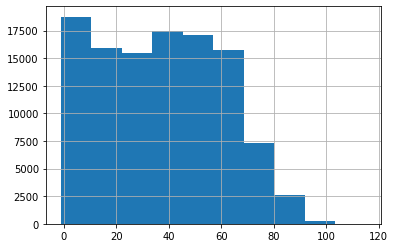

In [ ]:
df['Age'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


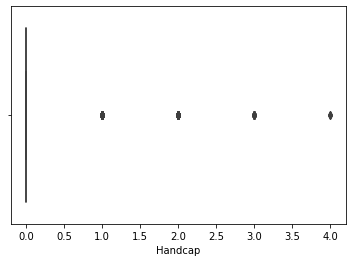

In [ ]:
sns.boxplot(df['Handcap'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  Show            110527 non-null  bool   
dtypes: bool(1), float64(1), int64(8), object(4)
memory usage: 11.1+ MB


#### Задание 2
Приведите колонки к правильным типам данных (по крайней мере временные)

In [ ]:
df = df.replace({'Scholarship': {1: True, 0: False},
                 'Hipertension': {1: True, 0: False},
                 'Diabetes': {1: True, 0: False},
                 'Alcoholism': {1: True, 0: False},
                 'SMS_received': {1: True, 0: False}})
df = df.astype({'ScheduledDay': np.datetime64, 
           'AppointmentDay': np.datetime64, 
           'Age': np.int16, 
           'Handcap': np.int16,})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int16         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  bool          
 8   Hipertension    110527 non-null  bool          
 9   Diabetes        110527 non-null  bool          
 10  Alcoholism      110527 non-null  bool          
 11  Handcap         110527 non-null  int16         
 12  SMS_received    110527 non-null  bool          
 13  Show            110527 non-null  bool          
dtypes: bool(6), datetime64[ns](2), float

#### Задание 3
Проверьте диапазоны значений возраста (Age)

Есть ли записи, которые кажутся вам подозрительными?
Стоит ли эти записи оставить или стоит убрать? Почему вы так думаете (в решении этого вопроса может помочь описание данных на сайте kaggle)?

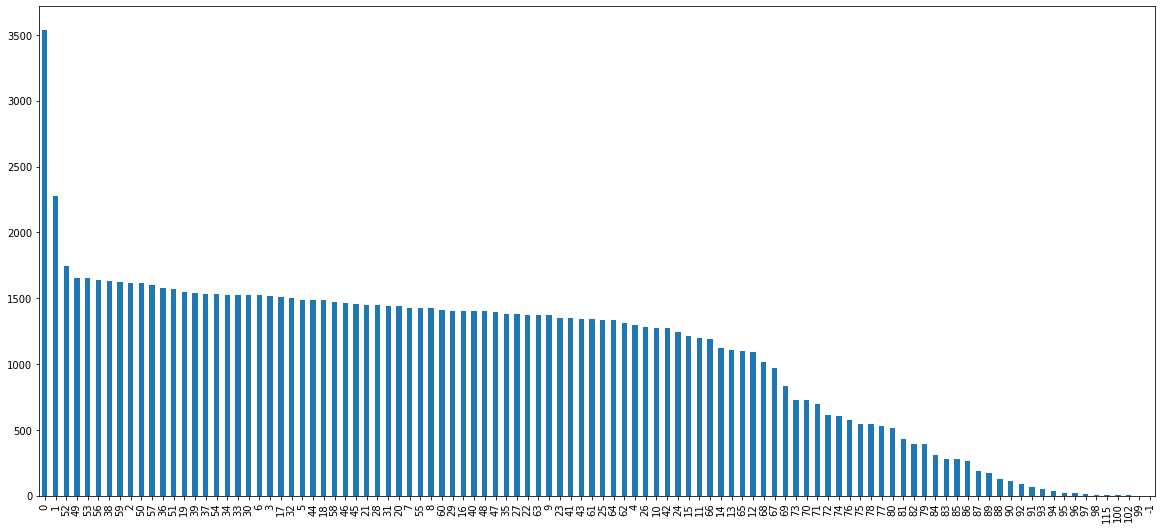

In [ ]:
df['Age'].value_counts().plot(kind='bar', figsize=(20,9))

In [ ]:
df[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,False,False,False,False,0,False,True


In [ ]:
#возраст -1 кажется подозрительным, скорее всего возраст данного пациента неизвестен
#удалим записи с возрастом -1. таких записей всего 1 штука, поэтому удаление одной стоки не повлияет на дальнейший анализ
df_age_negative = df[ df['Age'] == -1 ]
df = df.drop(df_age_negative.index, axis=0)

#### Задание 4
Уникальные ли пациенты в нашей таблице? Мы имеем дело со списком разовых приемов или по крайней мере часть из них регулярные?

In [ ]:
df.groupby('PatientId').size().unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8, 11, 12, 51, 10, 20,  9, 84, 16, 19,
       15, 62, 13, 18, 21, 14, 17, 55, 23, 35, 38, 30, 24, 42, 37, 46, 70,
       65, 22, 57, 29, 34, 54, 40, 33, 88, 50])

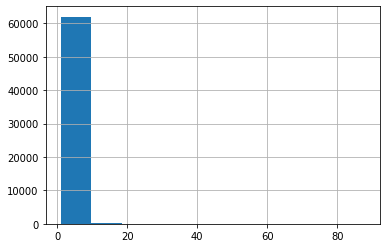

In [ ]:
df.groupby('PatientId').size().hist()
#часть из приемов регулярны, однако в большинстве посещения единичны

#### Задание 5
Если у нас имеются неоднократные посещения, влияет ли как-то номер (1-ый 2-ой 3-ий...) приёма на явку? Где прогулы происходят чаще, для регулярных посещений или для разовых? В решении этого задания вам может помочь функция [.rank()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.core.groupby.GroupBy.rank.html) 

[stackoverflow](https://stackoverflow.com/questions/33899369/ranking-order-per-group-in-pandas)

Можно ли уверенно говорить о шансе посещения для больших номеров?

In [ ]:
df['VisitsRank'] = df.groupby('PatientId')['AppointmentID'].rank("dense", ascending=False)
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,VisitsRank
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,True,1.0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,True,1.0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,True,1.0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,True,1.0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,False,False,False,False,0,True,True,1.0
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,False,False,False,False,0,True,True,2.0
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,False,False,False,False,0,True,True,1.0
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,False,False,False,False,0,True,True,2.0


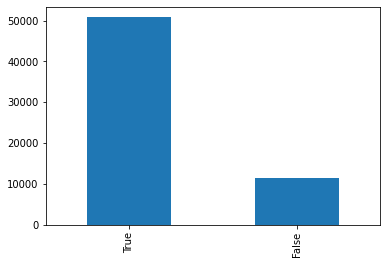

In [ ]:
df[df['VisitsRank'] == 1]['Show'].value_counts().plot(kind='bar')

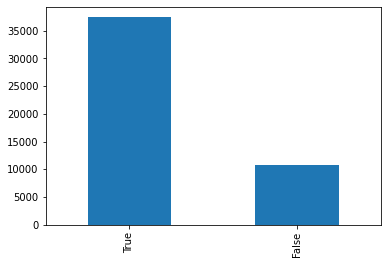

In [ ]:
df[df['VisitsRank'] > 1]['Show'].value_counts().plot(kind='bar')
#прогулы происходят чаще во втором и последующих посещениях, чем в 1

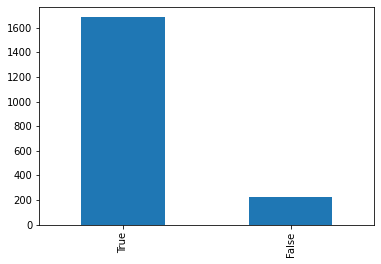

In [ ]:
df[df['VisitsRank'] > 10]['Show'].value_counts().plot(kind='bar')
#шанс посещения намного увеличивается с 10 и т.д. посещения

#### Задание 6
Исследуйте влияние возраста на явку. Удобно использовать функцию [pd.cut](https://stackoverflow.com/questions/45751390/pandas-how-to-use-pd-cut) для создания интервалов. 

In [ ]:
age = [0, 18, 35, 60, 80, 120]
df['Age category'] = pd.cut(df['Age'], age,labels=['young','middle', 'adult', 'old', 'very old'], right=False)

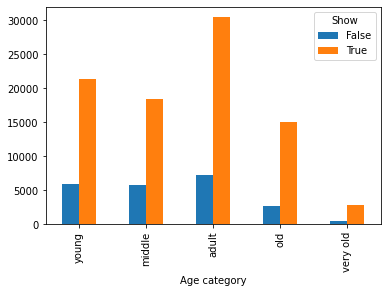

In [ ]:
df.groupby('Age category')['Show'].value_counts().unstack().plot(kind='bar')
#старые люди редко не приходят на прием
#люди среднего возроста и молодые чаще не приходят на прием

#### Задание 7
К разбивке по возрастам, добавьте разбивку по полу. Может быть один пол прогуливает приемы чаще другого? Во всех ли возрастных группах мы можем уверенно сравнивать шанс пропуска (иными словами, нет ли в какой-нибудь из групп перекоса в сторону мужчин или женщин по кол-ву записей о приемах)?

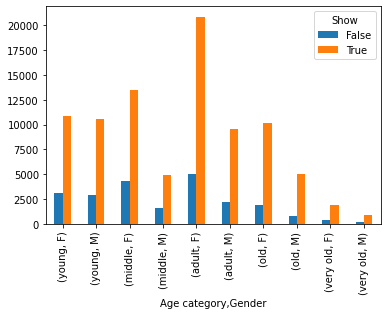

In [ ]:
df.groupby(['Age category', 'Gender'])['Show'].value_counts().unstack().plot(kind='bar')
#по данным этого графика нельзя сказать, что какой-то из полов прогуливает чаще

#### Задание 8
Исследуйте влияние времени ожидания приёма на явку. Можно воспользоваться тем же подходом, что и в задании 5.

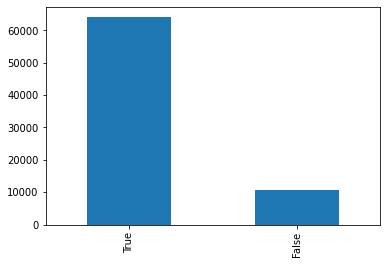

In [ ]:
df['WaitingDays'] = (df['AppointmentDay'].dt.date - df['ScheduledDay'].dt.date).dt.days
df[df['WaitingDays'] < 10]['Show'].value_counts().plot(kind='bar')

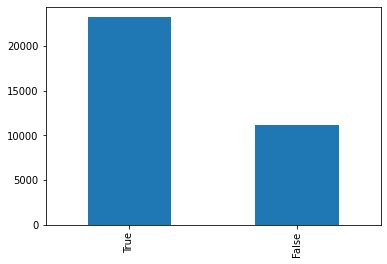

In [ ]:
df[df['WaitingDays'] > 10]['Show'].value_counts().plot(kind='bar')
#Вывод: те, кто ждал прием меньше 10 дней реже прогуливали
# те, кто больше 10 дней прогуливали чаще

#### Задание 9
В общем по выборке влияет ли СМС на явку?

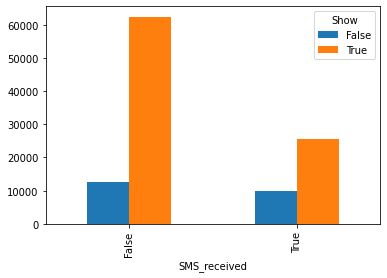

In [ ]:
df.groupby('SMS_received')['Show'].value_counts().unstack().plot(kind='bar')
#влияет, те, кто получил смс оповещение прогуливали относительно чаще тех, кто не получил
#

#### Задание 10
Исследуйте влияние отправки СМС на явку среди прогульщиков. Прогульщиком назовем тех, кто хотя бы раз пропускал прием.

Верны ли эти выводы для тех пациентов у которых было более 1-ой записи (>=5 записей)?

Для пациентов с количеством записей >= 5 посчитайте корреляцию между sms_received и show для каждого пациента, и отобразите их на гистограмме. В какую сторону смещена гистограмма, о чем это говорит?

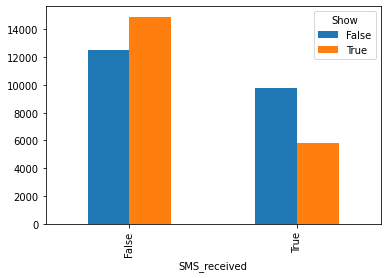

In [ ]:
truants = df.groupby('PatientId')['Show'].agg(['mean']).query('mean < 1').index
df[df['PatientId'].isin(truants)].groupby('SMS_received')['Show'].value_counts().unstack().plot(kind='bar')
#тем, кому было отправлено смс прогуливали чаще, чем те, кому не было отправлено

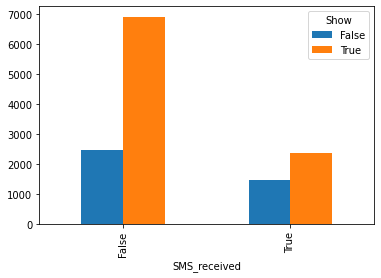

In [ ]:
#>=5 записей
truants_2 = df.groupby('PatientId')['Show'].agg(['mean', 'count']).query('mean < 1 & count>=5').index
df[df['PatientId'].isin(truants_2)].groupby('SMS_received')['Show'].value_counts().unstack().plot(kind='bar')
#по-прежнему, тем, кому было отправлено смс прогуливали чаще, чем те, кому не было отправлено
#однако доля посещаемости увеличилась для обоих случаев

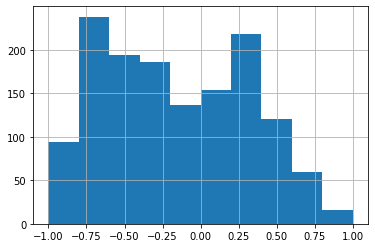

In [ ]:
df[df['PatientId'].isin(truants_2)].groupby('PatientId')[['SMS_received', 'Show']].corr().unstack().dropna()['Show']['SMS_received'].hist()
#гистограмма смещена влево
#следовательно между велечинами обратная линейная зависимость
#также имеются некоторые записи с линейной зависимостью

#### Задание 11
Проанализируйте еще какой-нибудь возможный фактор, влияющий на явку. Можно попробовать совместить несколько уже рассмотренных признаков, и посмотреть на более узкие группы людей

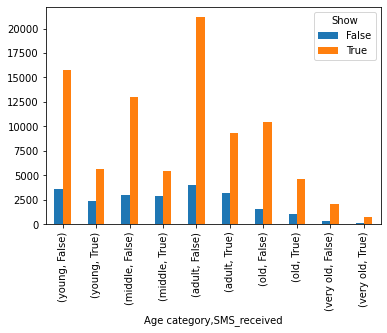

In [ ]:
#зависимость возрастной категории и смс оповещения
df.groupby(['Age category', 'SMS_received'])['Show'].value_counts().unstack().plot(kind='bar')
#для всех возрастов характерно, что с смс оповещением прогуливают чаще

### Задание 12
Возьмите набор данных customer churn, и сделайте корреляционный анализ средствами pandas.

1. Проверьте, есть ли скоррелированные признаки в наборе данных (corr() + heatmap)
2. Посчитайте корреляцию каждого признака с целевой переменной

https://drive.google.com/file/d/1GN5tTvVBO9xoafkyhY67NZ5k6KuzG3gP/view?usp=sharing

Целевая переменная у нас это отток: Да/нет


In [ ]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


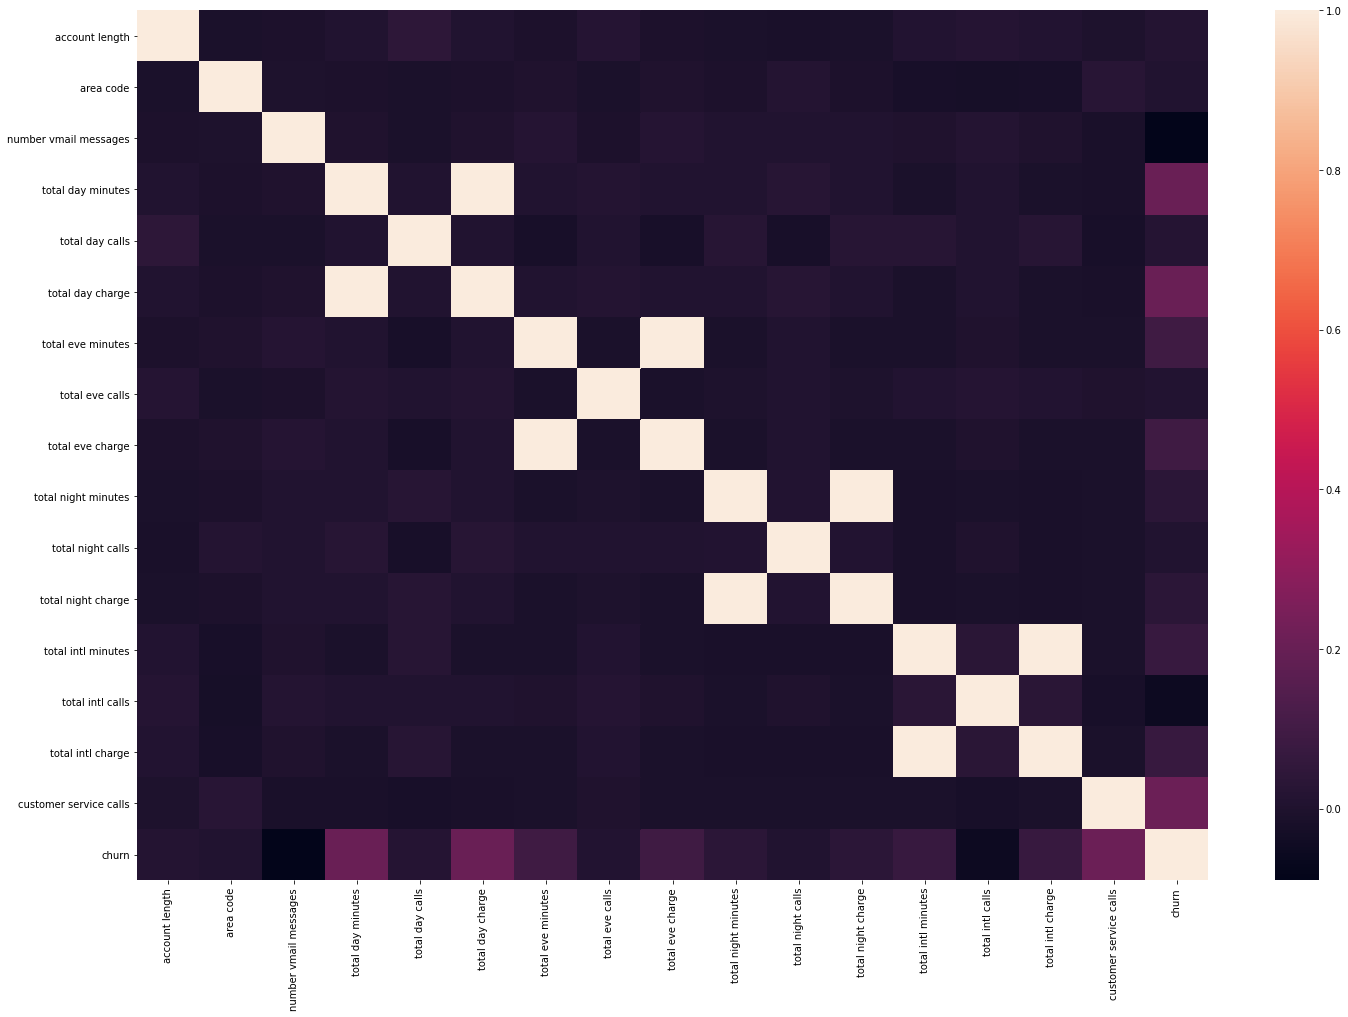

In [ ]:
plt.figure(figsize=(24, 16))
sns.heatmap(df.corr(method ='pearson'))


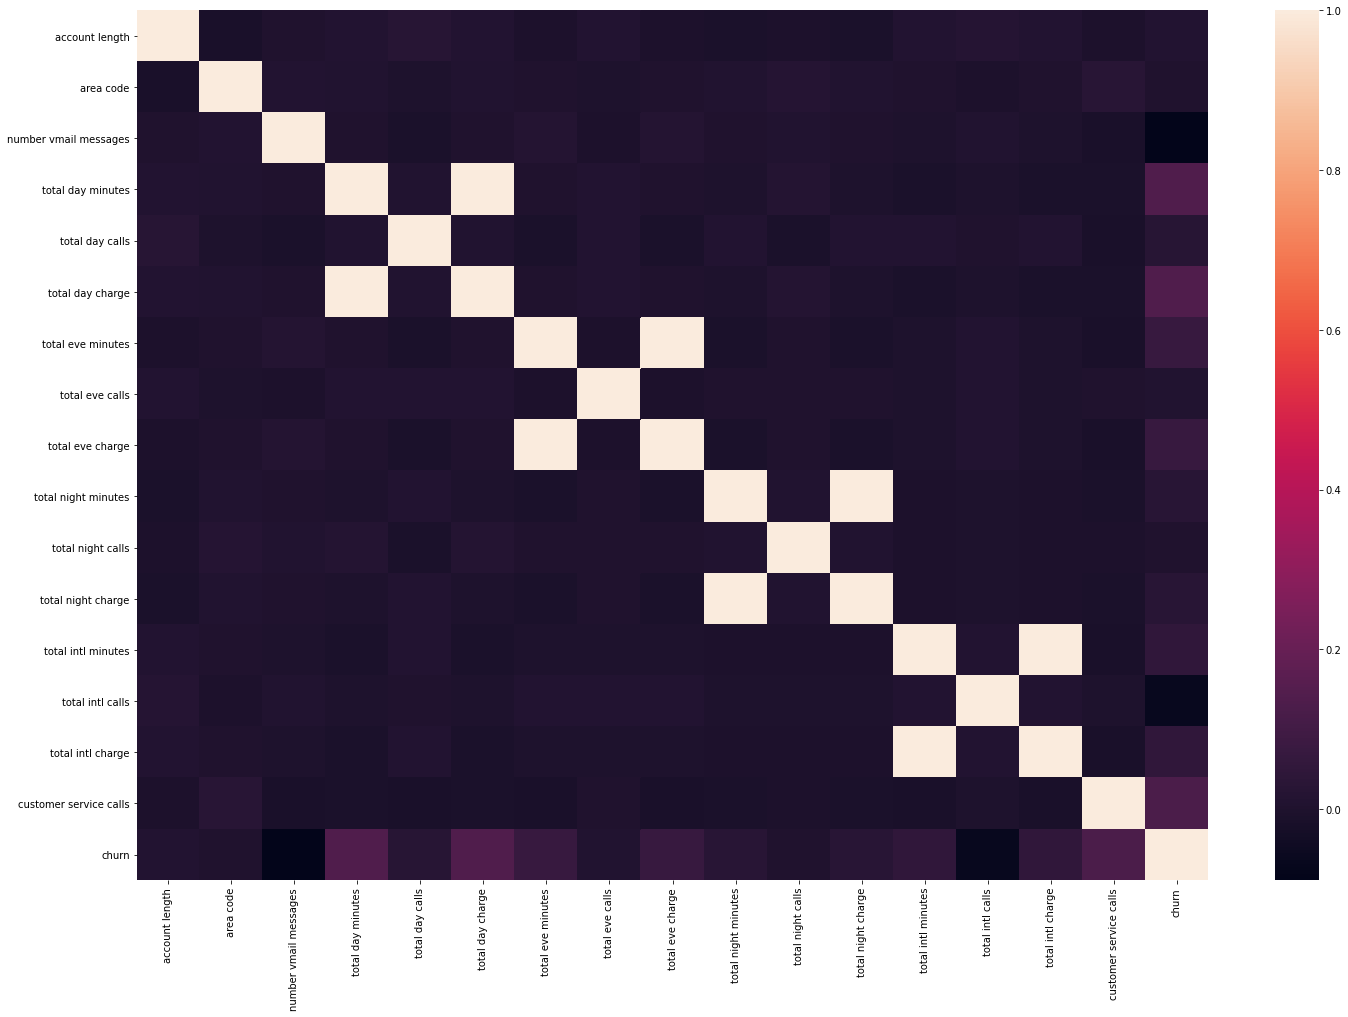

In [ ]:
plt.figure(figsize=(24, 16))
sns.heatmap(df.corr(method ='kendall'))

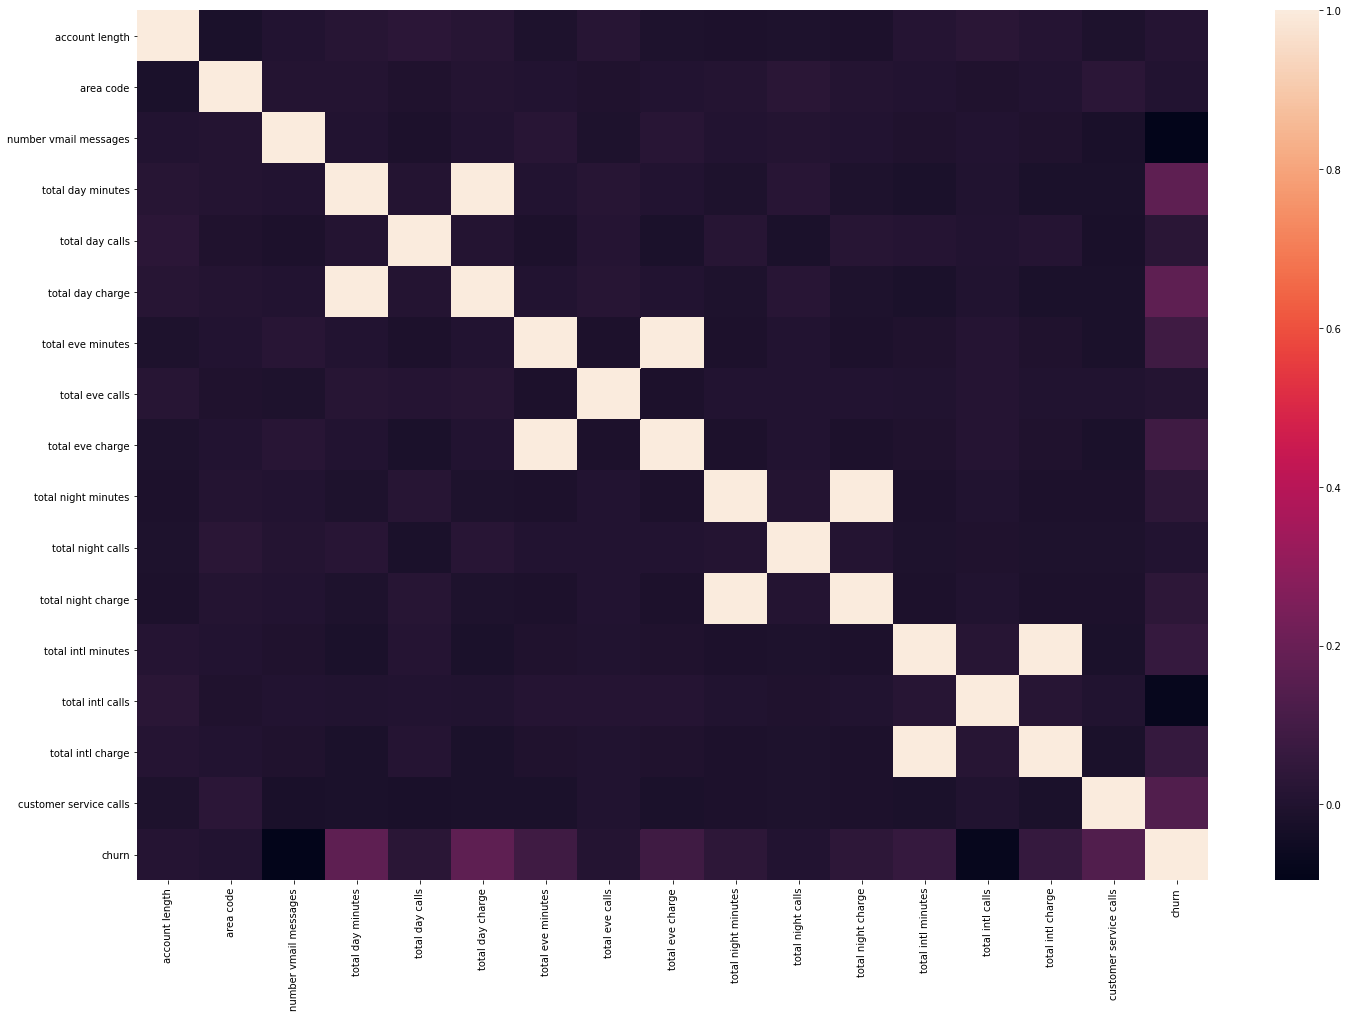

In [ ]:
plt.figure(figsize=(24, 16))
sns.heatmap(df.corr(method ='spearman'))
#в наборе нет скоррелированных признаков

In [ ]:
corr_matr = df.corr()
corr_matr['churn']

account length            0.016541
area code                 0.006174
number vmail messages    -0.089728
total day minutes         0.205151
total day calls           0.018459
total day charge          0.205151
total eve minutes         0.092796
total eve calls           0.009233
total eve charge          0.092786
total night minutes       0.035493
total night calls         0.006141
total night charge        0.035496
total intl minutes        0.068239
total intl calls         -0.052844
total intl charge         0.068259
customer service calls    0.208750
churn                     1.000000
Name: churn, dtype: float64

### Задание 13
Проведите когортный анализ по клиентам онлайн магазина, отобразив retention (процент клиентов в когорте в период 1-2-3- итд).


Данные для работы можно скачать [по ссылке](https://drive.google.com/file/d/1K5LLBiCZ6p_34ANiMo0rI46xMdP5ZfRT/view?usp=sharing). Это данные о продажах товаров одного интернет магазина, в данных содержится номер чека, номер товара на складе, его описание, кол-во товара в строчке чека, дата, цена за единицу, идентификатор покупателя, а также страна в которой произошла продажа.

In [ ]:
data = pd.read_csv('online retail.csv', encoding='latin1')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
data = data[['InvoiceDate', 'CustomerID']]
data = data.astype({'InvoiceDate': np.datetime64})
data

,InvoiceDate,CustomerID
0,2010-12-01 08:26:00,17850.0
1,2010-12-01 08:26:00,17850.0
2,2010-12-01 08:26:00,17850.0
3,2010-12-01 08:26:00,17850.0
4,2010-12-01 08:26:00,17850.0
...,...,...
541904,2011-12-09 12:50:00,12680.0
541905,2011-12-09 12:50:00,12680.0
541906,2011-12-09 12:50:00,12680.0
541907,2011-12-09 12:50:00,12680.0


In [ ]:
groups = data.groupby('CustomerID')['InvoiceDate'].min().dt.strftime('%Y-%m')

In [ ]:
df = pd.merge(data.set_index('CustomerID'), groups, left_index=True, right_index=True)
df

,InvoiceDate_x,InvoiceDate_y
CustomerID,,
12346.0,2011-01-18 10:01:00,2011-01
12346.0,2011-01-18 10:17:00,2011-01
12347.0,2010-12-07 14:57:00,2010-12
12347.0,2010-12-07 14:57:00,2010-12
12347.0,2010-12-07 14:57:00,2010-12
...,...,...
18287.0,2011-10-12 10:23:00,2011-05
18287.0,2011-10-12 10:23:00,2011-05
18287.0,2011-10-28 09:29:00,2011-05


In [ ]:
df = df.rename({'InvoiceDate_y': 'CohortGroup'}, axis=1)
df['OrderPeriod'] = df['InvoiceDate_x'].apply(lambda x: x.strftime('%Y-%m'))
df = df.drop('InvoiceDate_x', axis=1)
df = df.reset_index()
df

,CustomerID,CohortGroup,OrderPeriod
0,12346.0,2011-01,2011-01
1,12346.0,2011-01,2011-01
2,12347.0,2010-12,2010-12
3,12347.0,2010-12,2010-12
4,12347.0,2010-12,2010-12
...,...,...,...
406824,18287.0,2011-05,2011-10
406825,18287.0,2011-05,2011-10
406826,18287.0,2011-05,2011-10
406827,18287.0,2011-05,2011-10


In [ ]:
df = df.groupby(['CohortGroup', 'OrderPeriod']).count().rename({'CustomerID': 'orders'}, axis=1)
df

orders
CohortGroup OrderPeriod        
2010-12     2010-12       26850
            2011-01       10881
            2011-02        9183
            2011-03       12111
            2011-04       10092
...                         ...
2011-10     2011-11        3643
            2011-12         907
2011-11     2011-11       11249
            2011-12        1152
2011-12     2011-12         996

[91 rows x 1 columns]

In [ ]:
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = df.groupby(level=0).apply(cohort_period)
cohorts

orders  CohortPeriod
CohortGroup OrderPeriod                      
2010-12     2010-12       26850             1
            2011-01       10881             2
            2011-02        9183             3
            2011-03       12111             4
            2011-04       10092             5
...                         ...           ...
2011-10     2011-11        3643             2
            2011-12         907             3
2011-11     2011-11       11249             1
            2011-12        1152             2
2011-12     2011-12         996             1

[91 rows x 2 columns]

In [ ]:
results = cohorts.reset_index().set_index(['CohortGroup', 'CohortPeriod']).drop('OrderPeriod', axis=1)
results

orders
CohortGroup CohortPeriod        
2010-12     1              26850
            2              10881
            3               9183
            4              12111
            5              10092
...                          ...
2011-10     2               3643
            3                907
2011-11     1              11249
            2               1152
2011-12     1                996

[91 rows x 1 columns]

In [ ]:
results = results.unstack(level=1)
results

orders                   ...                          
CohortPeriod       1        2       3   ...       11       12      13
CohortGroup                             ...                          
2010-12       26850.0  10881.0  9183.0  ...  14361.0  23006.0  7409.0
2011-01       11031.0   2392.0  3072.0  ...   6535.0   1514.0     NaN
2011-02        8788.0   1488.0  1937.0  ...    435.0      NaN     NaN
2011-03       11151.0   1478.0  2498.0  ...      NaN      NaN     NaN
2011-04        7320.0   1435.0  1329.0  ...      NaN      NaN     NaN
2011-05        6087.0   1123.0   890.0  ...      NaN      NaN     NaN
2011-06        5652.0    939.0   733.0  ...      NaN      NaN     NaN
2011-07        5024.0    525.0  1353.0  ...      NaN      NaN     NaN
2011-08        4822.0   1608.0  2872.0  ...      NaN      NaN     NaN
2011-09        8343.0   2483.0  2719.0  ...      NaN      NaN     NaN
2011-10       11878.0   3643.0   907.0  ...      NaN      NaN     NaN
2011-11       11249.0   1152.0     NaN  ...      NaN      NaN     NaN
2011-12         996.0      NaN     NaN  ...      NaN      NaN     NaN

[13 rows x 13 columns]

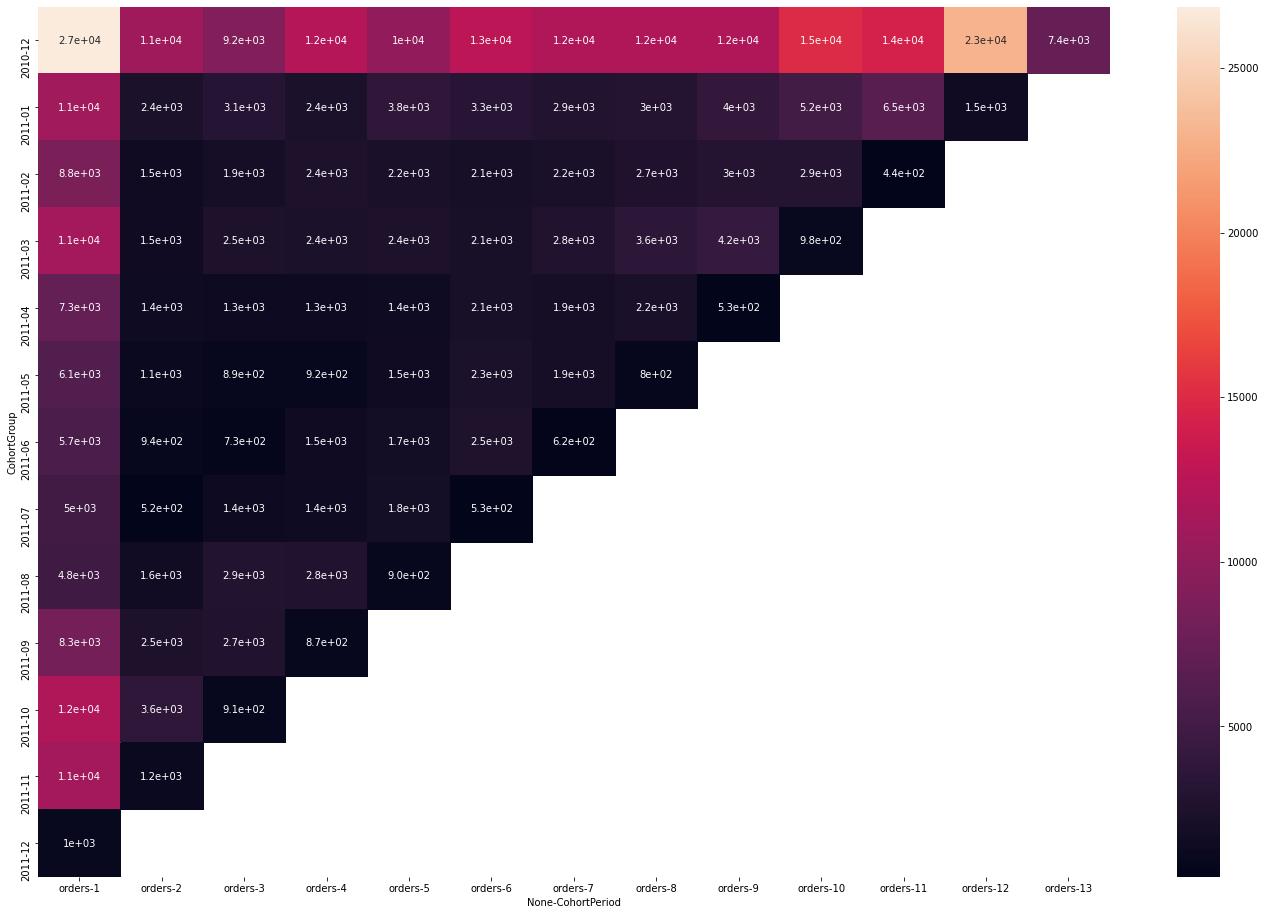

In [ ]:
plt.figure(figsize=(24, 16))
sns.heatmap(results, mask=results.isnull(), annot=True)

In [ ]:
results_relative = results.divide(results.T.max(), axis=0)
results_relative

orders                      ...                             
CohortPeriod     1         2         3   ...        11        12       13
CohortGroup                              ...                             
2010-12         1.0  0.405251  0.342011  ...  0.534860  0.856834  0.27594
2011-01         1.0  0.216843  0.278488  ...  0.592421  0.137250      NaN
2011-02         1.0  0.169322  0.220414  ...  0.049499       NaN      NaN
2011-03         1.0  0.132544  0.224016  ...       NaN       NaN      NaN
2011-04         1.0  0.196038  0.181557  ...       NaN       NaN      NaN
2011-05         1.0  0.184492  0.146213  ...       NaN       NaN      NaN
2011-06         1.0  0.166136  0.129689  ...       NaN       NaN      NaN
2011-07         1.0  0.104498  0.269307  ...       NaN       NaN      NaN
2011-08         1.0  0.333472  0.595603  ...       NaN       NaN      NaN
2011-09         1.0  0.297615  0.325902  ...       NaN       NaN      NaN
2011-10         1.0  0.306701  0.076360  ...       NaN       NaN      NaN
2011-11         1.0  0.102409       NaN  ...       NaN       NaN      NaN
2011-12         1.0       NaN       NaN  ...       NaN       NaN      NaN

[13 rows x 13 columns]

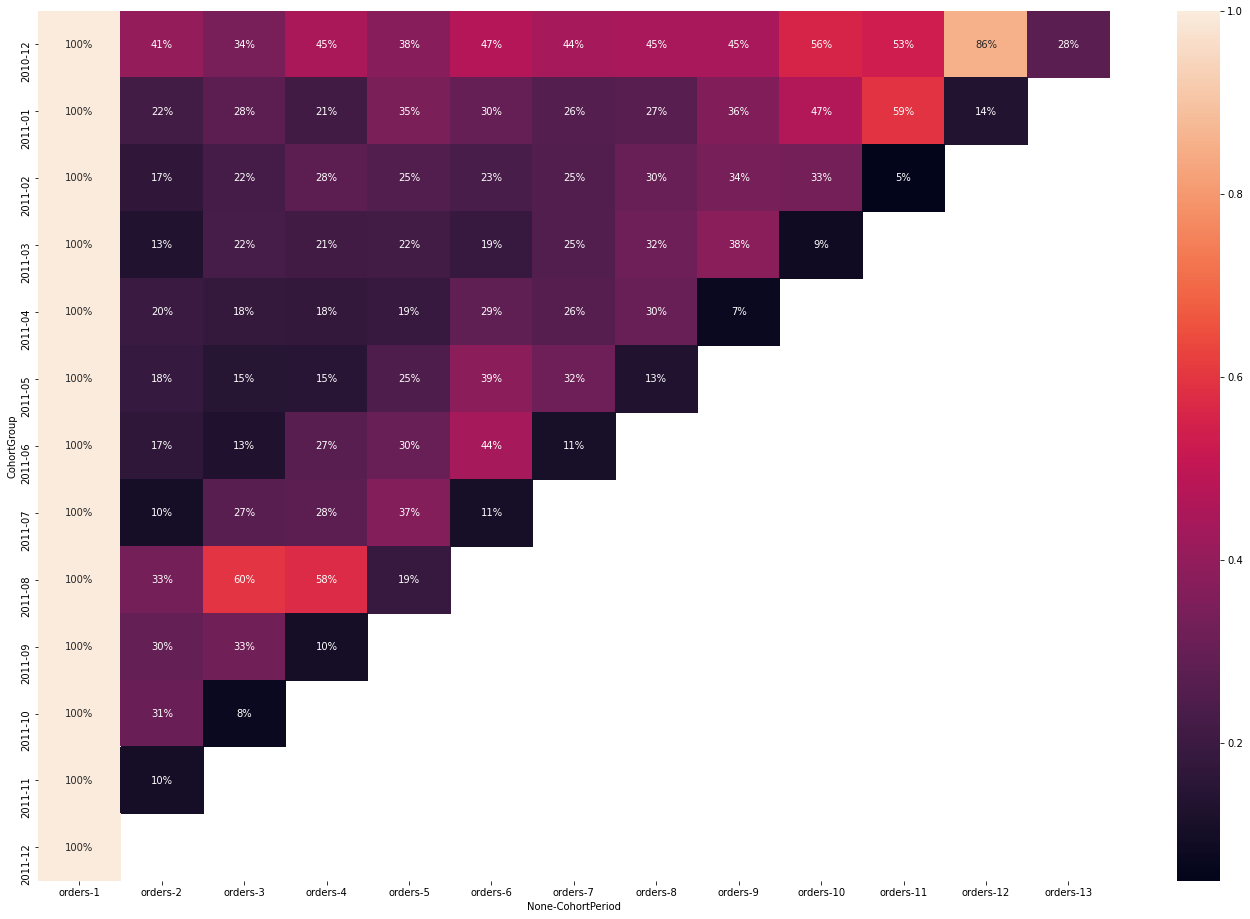

In [ ]:
plt.figure(figsize=(24, 16))
sns.heatmap(results_relative, mask=results_relative.isnull(), annot=True, fmt='.0%')